In [1]:
import pytesseract as pt

In [2]:
import cv2 as cv

In [3]:
img = cv.imread('diab_test.png')

In [4]:
p = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [5]:
custom_config = r'--oem 3 --psm 6'
pt.pytesseract.tesseract_cmd = p

In [6]:

text =pt.image_to_string(img, config= custom_config)

In [7]:
text

'Anjuman College\nHealth report\nName: John Doe Gender: Male Age: 50\nTest Name: Diabetes\nBio Chemical Test\nTest Description Result\nNo. of Pregnancies 6\nGlucose Level 14s\nBlood Pressure 2\n‘Skin Thickness 35\nInsulin 0\nBody Mass Index 33.6\nDiabetes Pedigree 0.627\n'

In [8]:
h, w, c = img.shape
boxes = pt.image_to_boxes(img, config=custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

In [11]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

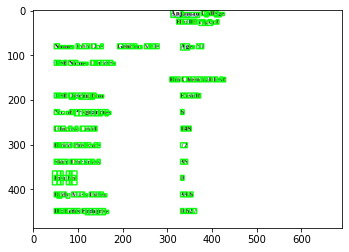

In [13]:
plt.imshow( img)
plt.show